Para conseguir lidar com a analise de sentimentos no rosto humano será necessário utilizar a biblioteca TensorFlow com o ImageDataGenerator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Para conseguirmos lidar com nosso dataset teremos que definir os caminhos dele

In [2]:
dir_train = "../data/Fer2013Dataset/test"
dir_test = "../data/Fer2013Dataset/train"

Agora precisamos criar varaiveis que vão conter transformções que queremos aplicar em nossos datasets.

In [3]:
datagen_train = ImageDataGenerator(
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255,
    validation_split = 0.2
)

datagen_test = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

Agora iremos carregar o caminho das imagens para poder preparar elas para treinamento em um modelo

In [4]:
train_generator = datagen_train.flow_from_directory(
    directory = dir_train,
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "training"
)

validation_generator = datagen_train.flow_from_directory(
    directory = dir_test,
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "validation"
)

Found 5746 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


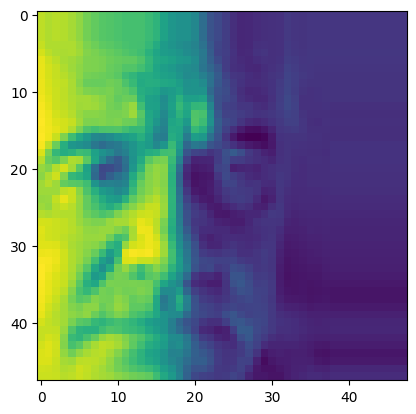

In [5]:
for images, _ in train_generator:
    plt.imshow(images[0])
    plt.show()
    break

# Criando uma CNN para nossa aplicação
Agora que já cuidamos do preprocessamento das nossa imagens, podemos utilizá-las para treinar um modelo CNN

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()